# Data Cleaning with Python

**Variables in the Housing Sales Dataset**

| Variable | Description |
|----------|-------------|
| Year, month | Year and month of the sale |
| Price (target) | Sale price of the house |
| Luxury (target) | Binary variable that takes value 1 if it's a luxury home (price over half a million $) and 0 otherwise |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms (half bathrooms refer to toilets) |
| sqft_living | Living room area |
| sqft_lot | Total area (including garden) |
| sqft_above | Area excluding basement |
| basement | Has basement? (1: yes, 0: no) |
| floors | Number of floors |
| waterfront | Has sea views? (1: yes, 0: no) |
| view | Has good views? (1: yes, 0: no) |
| condition | Housing condition (from A to D, A being the best condition) |
| yr_built | Year the house was built |
| yr_renovated | Year the house was renovated (if 0, it hasn't been renovated) |
| lat, long | Latitude and longitude coordinates of the house |

In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
pyo.init_notebook_mode(connected=True)
viviendas = pd.read_excel(r'C:\Users\alros\Documents\Master UCM Modulos Documentacion\7. Mineria de Datos y Modelizacion Predictiva\Guille\PARTE I_Depuracion y Regresiones\Ejercicio VentaViviendas\Depuracion\VentaViviendasOG.xlsx')
viviendas.head()


,year,month,price,Luxury,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,basement,yr_built,yr_renovated,lat,long
0,2014,7,653450,1,3,2.5,2070,-1,1.0,0,0,C,1540,1,1980,0,47.5936,-122.013
1,2014,6,710000,1,2,1.5,1640,-1,1.5,0,0,A,1540,1,1916,0,47.6624,-122.325
2,2014,10,780000,1,4,3.5,3720,-1,1.0,0,1,B,3720,0,2007,0,47.3216,-121.940
3,2014,12,795000,1,3,3.5,2260,-1,2.0,0,0,B,1880,1,2003,0,47.6422,-122.361
4,2014,10,399950,0,3,2.0,2050,-1,1.0,0,0,A,1170,1,1960,0,47.7447,-122.328


**First Impressions**

First we check that the variable description and if the data type makes sense for the kind of variable with _.info()_.
Then we check what  _.head()_ returned and see if there are any inconsitencies we can easily detect, for later cleansing; we will go into more detail ahead.

In [2]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5000 non-null   int64  
 1   month         5000 non-null   int64  
 2   price         5000 non-null   int64  
 3   Luxury        5000 non-null   int64  
 4   bedrooms      5000 non-null   int64  
 5   bathrooms     5000 non-null   float64
 6   sqft_living   5000 non-null   int64  
 7   sqft_lot      5000 non-null   int64  
 8   floors        5000 non-null   float64
 9   waterfront    5000 non-null   int64  
 10  view          5000 non-null   int64  
 11  condition     5000 non-null   object 
 12  sqft_above    5000 non-null   int64  
 13  basement      5000 non-null   int64  
 14  yr_built      5000 non-null   int64  
 15  yr_renovated  5000 non-null   int64  
 16  lat           5000 non-null   float64
 17  long          5000 non-null   float64
dtypes: float64(4), int64(13), ob

### Data Overview

We observe the following points regarding the dataset:

- The dataset contains 5,000 instances and 18 columns, with each column populated by 5,000 values, indicating no missing data. However, this does not necessarily imply that all values in these instances are accurate or valid.

- The **categorical variables** are represented as integers. These include the following variables: **Luxury, condition, waterfront, view,** and **basement**.

- The **floors** variable is currently stored as a float, which seems illogical, as a house cannot have a fractional or half floor (except in cases such as mezzanines, which are not typically considered a full floor in housing context). As observed in the output of `_.head()_`, this variable contains values such as **1.5**, indicating that a simple conversion to an integer type (int64) may not be appropriate.


### Identification of Misencoded Values

In this section, we identify values that do not conform to the expected data description or predefined schema. This process allows us to spot potential misencoded or inconsistent values that may affect the integrity and accuracy of the dataset.


In [3]:
viviendas.nunique()

year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64

### Identification of Misencoded Values

We observe the following discrepancies in the dataset:

- The **waterfront** variable, which is expected to be dichotomous, contains 3 unique values instead of the expected 2.
- The **condition** variable has 5 unique values, while it should only have 4 (A, B, C, and D).
- The **floors** variable displays 6 unique values. While this is not necessarily incorrect, as noted earlier in the `_.head()_` output, some of the values contain decimal portions.

We will further investigate these three variables through the use of bar graphs to better understand their distribution and identify any misencoded values.


In [4]:

# Compute the value counts for the 'waterfront' column
woterfront_count = viviendas["waterfront"].value_counts().reset_index()

# Rename columns for clarity
woterfront_count.columns = ['waterfront', 'count']

# Create the bar chart with the corrected DataFrame
figA = px.bar(woterfront_count, x='waterfront', y='count', title='Waterfront Properties')

# Show the bar chart
figA.show()


In [5]:

# Compute value counts, reset index, and sort by 'condition' alphabetically
condition_count = viviendas["condition"].value_counts().reset_index()

# Rename columns for clarity
condition_count.columns = ['condition', 'count']

# Sort the DataFrame by 'condition' column alphabetically
condition_count = condition_count.sort_values(by='condition')

# Create the bar chart
figA = px.bar(condition_count, x='condition', y='count', title='Conditions')
figA.show()


In [6]:
floor_counts = viviendas['floors'].value_counts().reset_index()
floor_counts.columns = ['floors', 'count']  # Rename columns for clarity

# Create a bar chart
figC = px.bar(floor_counts, x='floors', y='count', title='Frequency of Floors')
figC.show()

### Observations from Bar Charts

Based on the bar charts, the following observations can be made regarding the three previously mentioned variables:

- **Waterfront**: The third value, which should not be present, corresponds to **-1**, an out-of-range value.
- **Floors**: There are instances where the number of floors is recorded as **1.5, 2.5,** or **3.5**.
- **Condition**: There are instances where the value is recorded as **?**, which likely indicates missing or misencoded data.

These findings warrant further investigation and cleaning of the dataset to ensure data integrity.


### Convert Variables to the Appropriate Data Type

Before proceeding to handle the previously identified variables, we will first convert them to the correct data type.

- The **categorical variables**, which have values less than or equal to 5, will be converted to the **category** data type. We will create a function to declare these variables as categorical, replacing their current data type.
  
- For the **floors** variable, which is currently of type **float** (due to decimal values such as 1.5), we will address the undeclared values before converting it to the **integer** data type.

- The **yr_renovated** variable can have a value of **0** when no renovation has occurred. We will convert this variable to **categorical** because treating it as a numeric variable could skew the data cleaning process. Specifically, instances with a value of 0 may be mistakenly considered outliers, which could negatively impact future modeling.

These conversions are essential for ensuring proper data handling and preparing the dataset for further analysis.


In [7]:
#viviendas.info()
viviendas.nunique()

year               2
month             12
price           1709
Luxury             2
bedrooms          33
bathrooms         12
sqft_living      570
sqft_lot        3113
floors             6
waterfront         3
view               2
condition          5
sqft_above       527
basement           2
yr_built         116
yr_renovated      58
lat             2985
long             602
dtype: int64

In [8]:
#to_factor = list(viviendas.loc[:, (viviendas.nunique() <= 5) & (viviendas.columns != "year") & (viviendas.columns == 'yr_renovated')])
#viviendas[to_factor] = viviendas[to_factor].astype('category')


# Filter columns with 5 or fewer unique values, excluding 'floors', 'year', and 'month'
to_factor = list(viviendas.columns[(viviendas.nunique() <= 5)])
to_factor = [col for col in to_factor if col not in ['floors', 'year', 'month']]

# Ensure 'yr_renovated' is added to to_factor if it's present and not already included
if 'yr_renovated' in viviendas.columns and 'yr_renovated' not in to_factor:
    to_factor.append('yr_renovated')

# Convert selected columns to 'category'
viviendas[to_factor] = viviendas[to_factor].astype('category')



In [9]:
viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   int64   
 1   month         5000 non-null   int64   
 2   price         5000 non-null   int64   
 3   Luxury        5000 non-null   category
 4   bedrooms      5000 non-null   int64   
 5   bathrooms     5000 non-null   float64 
 6   sqft_living   5000 non-null   int64   
 7   sqft_lot      5000 non-null   int64   
 8   floors        5000 non-null   float64 
 9   waterfront    5000 non-null   category
 10  view          5000 non-null   category
 11  condition     5000 non-null   category
 12  sqft_above    5000 non-null   int64   
 13  basement      5000 non-null   category
 14  yr_built      5000 non-null   int64   
 15  yr_renovated  5000 non-null   category
 16  lat           5000 non-null   float64 
 17  long          5000 non-null   float64 
dtypes: categ

### Description and Graphical Inspection of the Numerical Variables 

In [10]:
viviendas.describe().round(1)

,year,month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2014.3,6.6,544129.1,3.6,2.1,2077.4,13732.5,1.5,1784.9,1971.1,47.6,-122.2
std,0.5,3.1,372986.9,3.7,0.9,916.5,37581.4,0.5,824.3,29.2,0.1,0.1
min,2014.0,1.0,86500.0,0.0,0.0,370.0,-1.0,1.0,370.0,1900.0,47.2,-122.5
25%,2014.0,4.0,324937.5,3.0,1.5,1410.0,4500.0,1.0,1190.0,1951.0,47.5,-122.3
50%,2014.0,6.0,451000.0,3.0,2.5,1910.0,7312.0,1.5,1550.0,1975.0,47.6,-122.2
75%,2015.0,9.0,645000.0,4.0,2.5,2560.0,10284.2,2.0,2220.0,1996.0,47.7,-122.1
max,2015.0,12.0,7062500.0,70.0,6.0,10040.0,1164794.0,3.5,7680.0,2015.0,47.8,-121.4


Cont


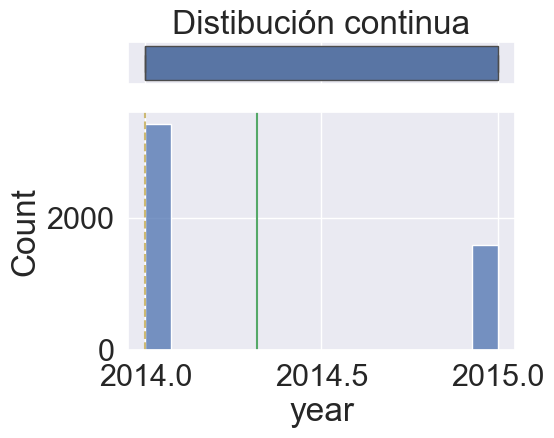

Cont


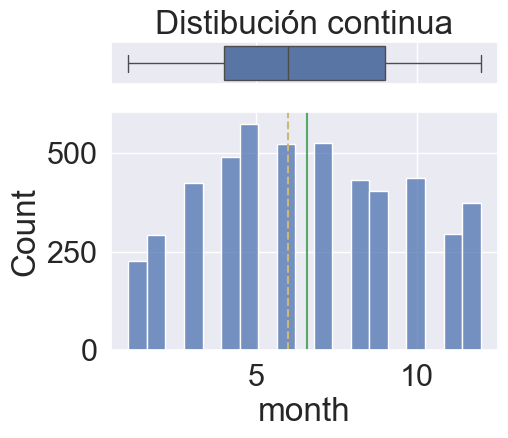

Cont


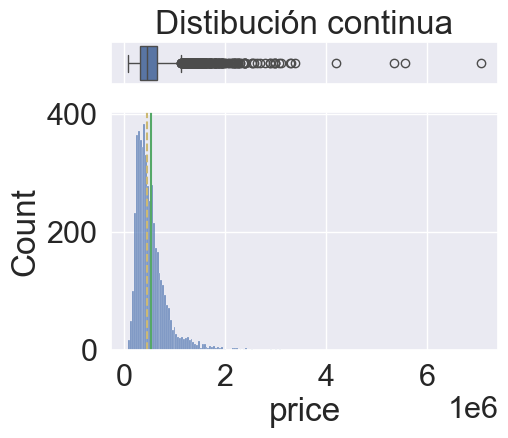

Cat


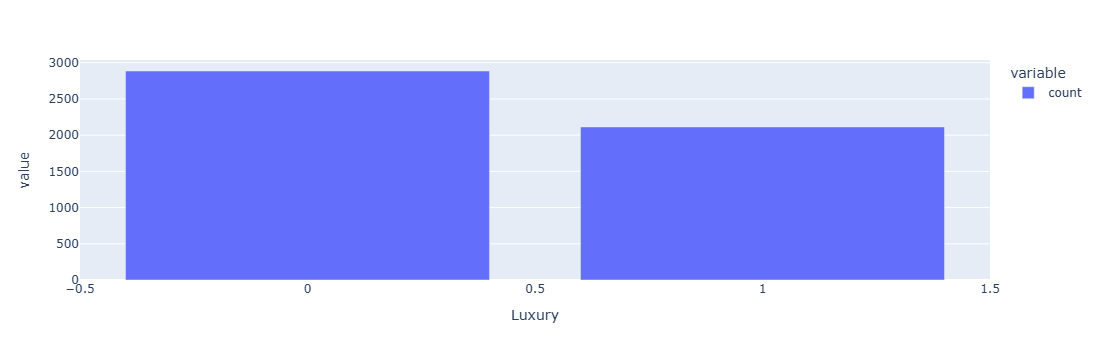

Cont


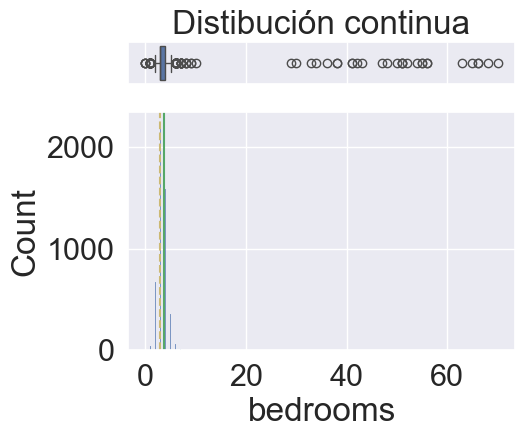

Cont


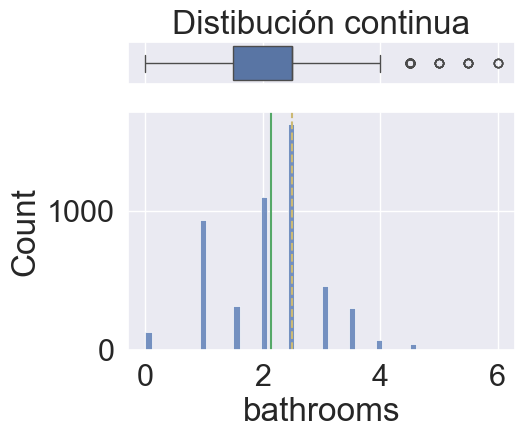

Cont


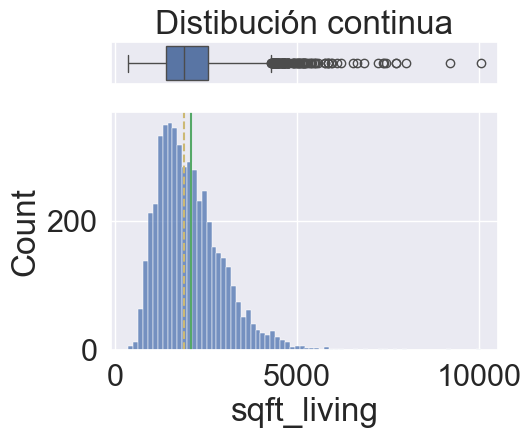

Cont


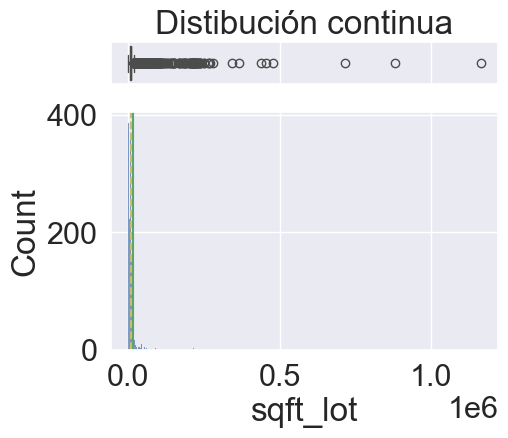

Cont


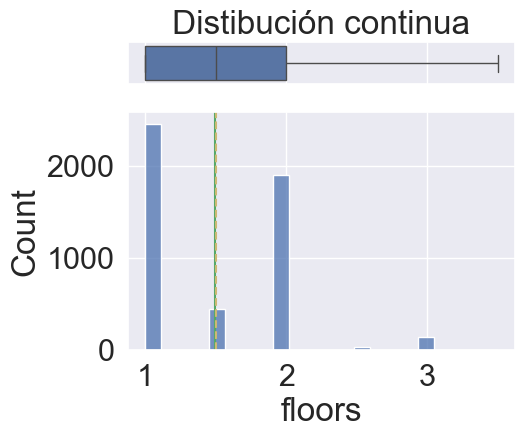

Cat


Cat


Cat


Cont


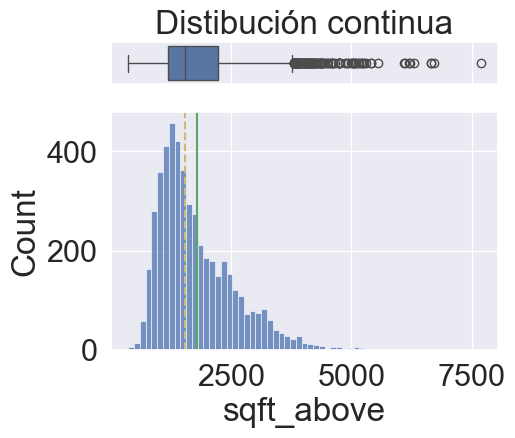

Cat


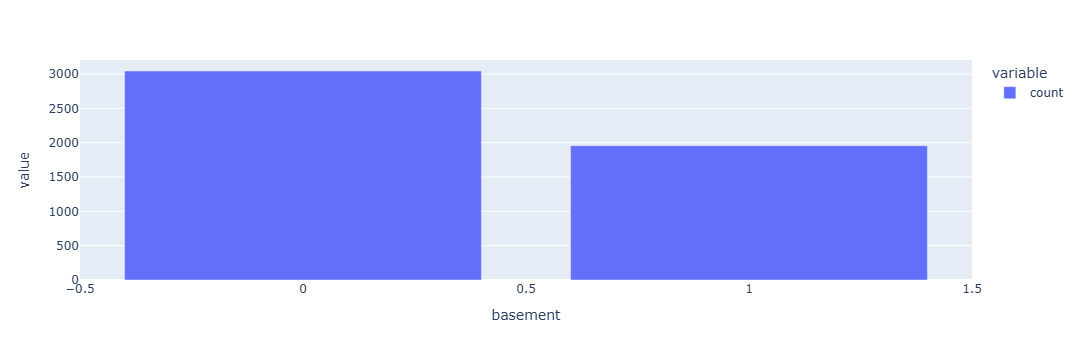

Cont


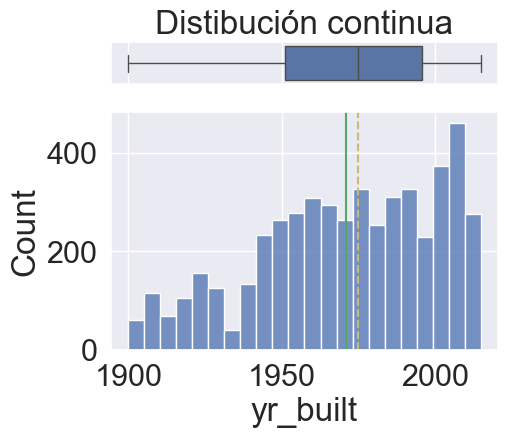

Cat


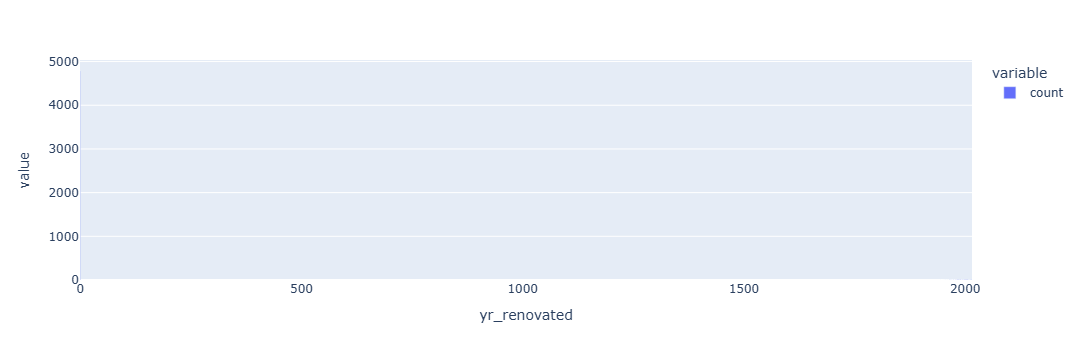

Cont


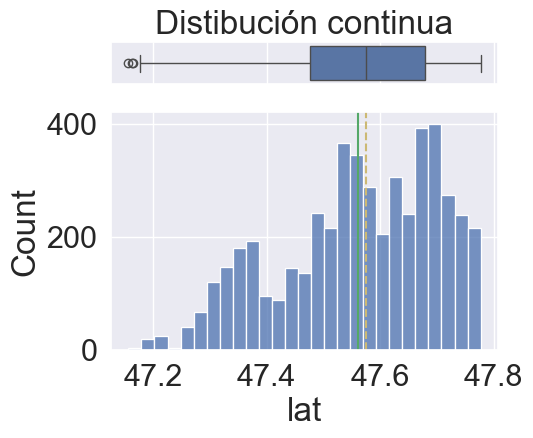

Cont


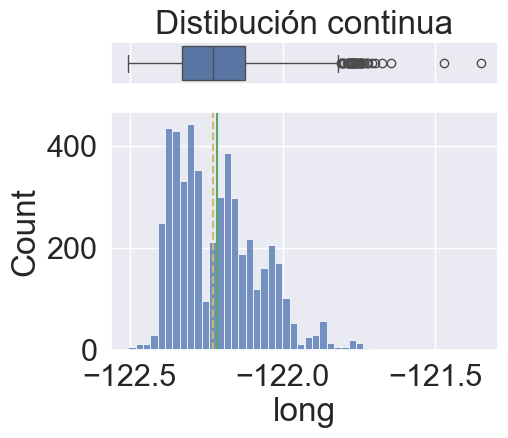

year            None
month           None
price           None
Luxury          None
bedrooms        None
bathrooms       None
sqft_living     None
sqft_lot        None
floors          None
waterfront      None
view            None
condition       None
sqft_above      None
basement        None
yr_built        None
yr_renovated    None
lat             None
long            None
dtype: object

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def histogram_boxplot(data, xlabel = None, title = None, font_scale=2, figsize=(5,4), bins = None):
    """ Boxplot and histogram combined
    data: 1-d data array
    xlabel: xlabel 
    title: title
    font_scale: the scale of the font (default 2)
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)

    example use: histogram_boxplot(np.random.rand(100), bins = 20, title="Fancy plot")
    """
    # Definir tamaño letra
    sns.set(font_scale=font_scale)
    # Crear ventana para los subgráficos
    f2, (ax_box2, ax_hist2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=figsize)
    # Crear boxplot
    sns.boxplot(x=data, ax=ax_box2)
    # Crear histograma
    sns.histplot(x=data, ax=ax_hist2, bins=bins) if bins else sns.histplot(x=data, ax=ax_hist2)
    # Pintar una línea con la media
    ax_hist2.axvline(np.mean(data),color='g',linestyle='-')
    # Pintar una línea con la mediana
    ax_hist2.axvline(np.median(data),color='y',linestyle='--')
    # Asignar título y nombre de eje si tal
    if xlabel: ax_hist2.set(xlabel=xlabel)
    if title: ax_box2.set(title=title, xlabel="")
    # Mostrar gráfico
    plt.show()

def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        #fig = sns.countplot(x=col)
        return(fig)

def plot(col):
     if col.dtypes != 'category':
        print('Cont')
        histogram_boxplot(col, xlabel = col.name, title = 'Distibución continua')
     else:
        print('Cat')
        cat_plot(col).show()

#pio.renderers.default = "notebook"
viviendas.apply(plot)

### Observations

We observe the following points regarding the dataset:

- **Price** follows a chi-squared distribution, but its maximum value is **7,062,500**, which could either be a valid value or an outlier. Further investigation is required to determine its nature.
- **Bedrooms** contains several outliers, with values that are significantly distant from the center of the distribution. A histogram will be created to explore its distribution in more detail. The statistical summary also reveals an instance with **70 bedrooms**, which is an extreme value.
- **Sqft_living** follows a chi-squared distribution, which is acceptable. However, the boxplot reveals several **outliers on the right side** of the distribution. A histogram will be generated for further analysis.
- **Sqft_lot** has a high concentration of values near **0**, likely due to the presence of **-1** as the minimum value, indicating undeclared missing values.
- **Floors** contains instances where the total number of floors is **1.5**, as confirmed earlier. Additionally, there is a small bar between **2 and 3**, which could indicate an **out-of-range value**.
- In **sqft_above**, which represents the total above-ground surface area of the house, the **maximum value is lower** than the maximum value of **sqft_living**, which only accounts for the living room. This indicates a **discrepancy** between these two related variables, as the living room size cannot exceed the total above-ground area of the house. This will be further analyzed.
- **Waterfront**, as noted earlier, contains **negative values (-1)**, which indicate undeclared missing values.
- **Condition** contains the value **?**, which we will interpret as referring to an **unknown condition**.

These observations highlight areas of the dataset that require further cleaning and analysis before proceeding with model development.


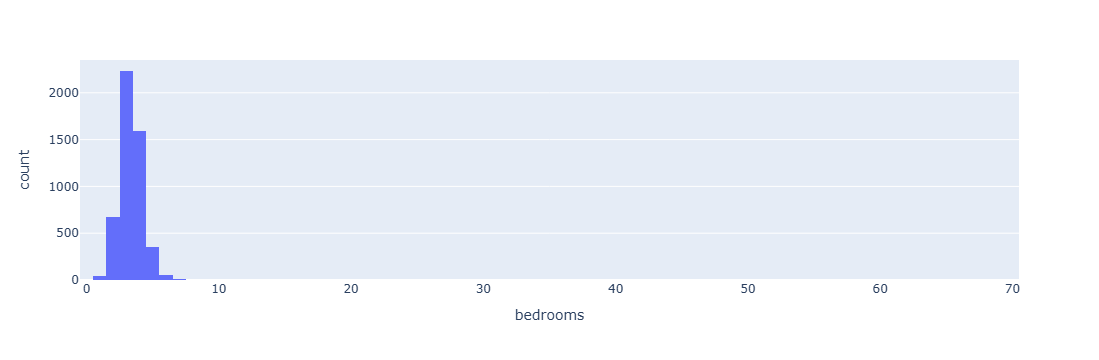

In [12]:
figB= px.histogram(viviendas,x="bedrooms")

figB.show()

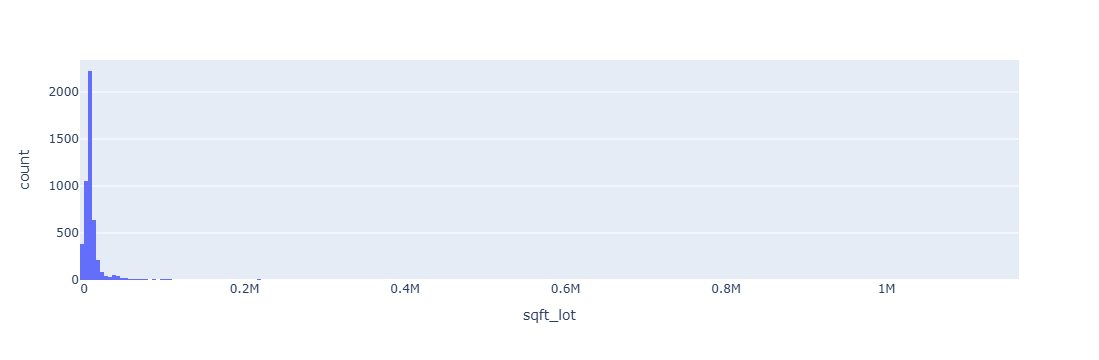

In [13]:
figB= px.histogram(viviendas,x="sqft_lot")

figB.show()

By analyzing the relationship between **sqft_living** and **sqft_above** we can observe that on all instances **sqft_living** is greater than **sqft_above**

In [14]:

(viviendas['sqft_living'] >= viviendas['sqft_above']).sum()


5000

### Data Quality Issues in `sqft_living` and `sqft_above`
In this section, a scatter plot is created to visualize the relationship between the variables `sqft_living` (living room space) and `sqft_above` (above-ground area). 

- First, I extracted the data for `sqft_living` as the dependent variable (`y`) and `sqft_above` as the independent variable (`x`).
- The scatter plot is generated using `plotly.graph_objects`, with the data points displayed as blue markers, and the best-fit line is shown in red.
-This plot allows us to visualize how `sqft_living` relates to `sqft_above`, and the best-fit line indicates the relationship between the two variables.


In [ ]:
import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression

# Scatter plot data
y = viviendas['sqft_living']
x = viviendas['sqft_above']

# Linear regression model
model = LinearRegression()
X = x.values.reshape(-1, 1)  # Reshape to make it 2D for sklearn
y = y.values

# Fit the model
model.fit(X, y)

# Get predictions from the model
predictions = model.predict(X)

# Create the scatter plot
scatter = go.Scatter(x=x, y=y, mode='markers', name='Data', marker=dict(color='blue'))

# Add best-fit line
best_fit_line = go.Scatter(x=x, y=predictions, mode='lines', name='Best Fit Line', line=dict(color='red'))

# Create the figure and add traces
fig = go.Figure(data=[scatter, best_fit_line])

# Update layout
fig.update_layout(
    title='Relatioship between sqft_living and Sqft_above',
    xaxis_title='sqft_living',
    yaxis_title='sqft_above',
    showlegend=True
)

# Show the plot
fig.show()


In [16]:

percent1 = ((viviendas['sqft_living'] == viviendas['sqft_above']).sum()/viviendas['sqft_living'].count())*100
percent2 = ((viviendas['sqft_living'] >= viviendas['sqft_above']).sum()/viviendas['sqft_living'].count())*100

print(percent1)
print(percent2)

60.88
100.0




The scatter plot highlights a potential data quality issue: if `sqft_living` were truly measuring only the living room space, it should always be smaller than `sqft_above`, which represents the total space above ground. However, the plot reveals that `sqft_living` is consistently larger than `sqft_above` in 100% of the data. This suggests that the variables `sqft_living` and `sqft_above` have been swapped, and we plan to invert their names to correct this issue.

Additionally, there are instances where `sqft_living` equals `sqft_above` for **60.88% of the data**, which further indicates a systemic error. This high percentage suggests that the issue is widespread and needs to be addressed to ensure the accuracy of the dataset.
### Handling Instances Where `sqft_living` Equals `sqft_above`

In [17]:
viviendas = viviendas.rename(columns={'sqft_living': 'sqft_above_r', 'sqft_above': 'sqft_living_r'})

In [18]:
viviendas.columns

Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_above_r', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_living_r', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')

In [19]:
percent1 = ((viviendas['sqft_living_r'] >= viviendas['sqft_above_r']).sum() / viviendas['sqft_living_r'].count()) * 100
percent2 = ((viviendas['sqft_living_r'] == viviendas['sqft_above_r']).sum() / viviendas['sqft_living_r'].count()) * 100

print(percent1)
print(percent2)

60.88
60.88


In [20]:
viviendas = viviendas.rename(columns={'sqft_above_r': 'sqft_above', 'sqft_living_r': 'sqft_living'})

In [21]:
viviendas.columns

Index(['year', 'month', 'price', 'Luxury', 'bedrooms', 'bathrooms',
       'sqft_above', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_living', 'basement', 'yr_built', 'yr_renovated', 'lat', 'long'],
      dtype='object')


Now that the variable names have been corrected by reversing `sqft_living` and `sqft_above`, we observe instances where the values of `sqft_living` and `sqft_above` are equal. Given that these values should not match, we will treat these instances as **missing data**. This is done under the assumption that the duplicate values represent errors in data entry, and replacing them with missing values will help maintain the integrity of the dataset.

These missing values will be addressed in the data cleaning process to ensure more accurate analysis moving forward.


### Error correction

1. Missing Value for  **sqft_lot** correction

In [22]:
viviendas.sqft_lot.replace(-1,np.nan,inplace=True)


#Checking the minimum and maximum
viviendas.sqft_lot.min(),viviendas.sqft_lot.max()


C:\Users\alros\AppData\Local\Temp\ipykernel_4360\1240391018.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





(638.0, 1164794.0)

2. Missing value for  **Waterfront** correction

In [23]:
viviendas.waterfront.replace(-1,np.nan,inplace=True)
viviendas['waterfront'].describe()


C:\Users\alros\AppData\Local\Temp\ipykernel_4360\3458594566.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\alros\AppData\Local\Temp\ipykernel_4360\3458594566.py:1: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



count     4894
unique       2
top          0
freq      4852
Name: waterfront, dtype: int64

3. Renaming **_?_** value to unknwon

In [24]:
viviendas.condition.replace('?','unknwon',inplace=True)

C:\Users\alros\AppData\Local\Temp\ipykernel_4360\2238455279.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\alros\AppData\Local\Temp\ipykernel_4360\2238455279.py:1: FutureWarning:

The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.



4. Replacing decimal values in **floors** to late impute them

In [25]:
viviendas.floors.replace([1.5,2.5,3.5],np.nan,inplace=True)

C:\Users\alros\AppData\Local\Temp\ipykernel_4360\1724892271.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





5. Replaciong Values where sqft_livng = sqft_above

In [26]:
viviendas['sqft_living'] = viviendas['sqft_living'].where(viviendas['sqft_living'] != viviendas['sqft_above'], np.nan)

### Managing Outliers

To begin managing outliers, we first separate our target variables from the rest of the dataset. This allows us to focus specifically on the data that will be used in modeling, ensuring that we can handle any outliers in a controlled manner without affecting the target variable.



In [27]:
imput = viviendas.drop(['price','Luxury'],axis=1)

In [28]:
imput.select_dtypes(include=np.number).skew()

year            0.787806
month           0.069568
bedrooms       12.916180
bathrooms       0.035777
sqft_above      1.404513
sqft_lot       12.669925
floors          0.604916
sqft_living     2.417187
yr_built       -0.465003
lat            -0.511038
long            0.796275
dtype: float64

### Assessing the Impact of Outliers

- As observed, the variable `bedrooms` shows a significant positive skew, which is largely caused by the outliers identified earlier.
- Similarly, `sqft_living`, `sqft_lot`, and `sqft_above` also exhibit a positive skew, indicating the presence of outliers in these variables as well.

Before addressing the outliers, we first evaluate their impact by calculating the percentage of outlier records relative to the total number of records. This helps us understand the extent to which outliers might be affecting the distributions of these variables. 

If more than 20% of the records are outliers, this suggests a potential bimodal distribution, indicating the presence of two distinct populations within the data. On the other hand, if the percentage of outliers is low, it might be manageable without significantly affecting the overall distribution of the variables.


In [29]:
def winsorize_with_pandas(s, limits):
    """
    s : pd.Series
        Series to winsorize
    limits : tuple of float
        Tuple of the percentages to cut on each side of the array, 
        with respect to the number of unmasked data, as floats between 0. and 1
    """
    return s.clip(lower=s.quantile(limits[0], interpolation='lower'), 
                  upper=s.quantile(1-limits[1], interpolation='higher'))

from scipy import stats


##  outliers managing function
def gestiona_outliers(col,clas = 'check'):
     print(col.name)
     # Condición de asimetría y aplicación de criterio 1 según el caso
     if abs(col.skew()) < 1:
        criterio1 = abs((col-col.mean())/col.std())>3
     else:
        criterio1 = abs((col-col.median())/stats.median_abs_deviation(col))>6 ## Cambio mad por median_abs_deviation!! 
     
     # Calcular primer cuartil     
     q1 = col.quantile(0.25)  
     # Calcular tercer cuartil  
     q3 = col.quantile(0.75)
     # Calculo de IQR
     IQR=q3-q1
     # Calcular criterio 2 (general para cualquier asimetría)
     criterio2 = (col<(q1 - 3*IQR))|(col>(q3 + 3*IQR))
     lower = col[criterio1&criterio2&(col<q1)].count()/col.dropna().count()
     upper = col[criterio1&criterio2&(col>q3)].count()/col.dropna().count()
     # Salida según el tipo deseado
     if clas == 'check':
            return(lower*100,upper*100,(lower+upper)*100)
     elif clas == 'winsor':
            return(winsorize_with_pandas(col,(lower,upper)))
     elif clas == 'miss':
            print('\n MissingAntes: ' + str(col.isna().sum()))
            col.loc[criterio1&criterio2] = np.nan
            print('MissingDespues: ' + str(col.isna().sum()) +'\n')
            return(col)

          
# called in check mode
imput.select_dtypes(include=np.number).apply(lambda x: gestiona_outliers(x))#.set_index(['Low','up','Tot'])


year
month
bedrooms
bathrooms
sqft_above
sqft_lot
floors
sqft_living
yr_built
lat
long


,year,month,bedrooms,bathrooms,sqft_above,sqft_lot,floors,sqft_living,yr_built,lat,long
0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.6,0.08,0.28,0.0,0.0,0.0,0.0,0.0,0.04
2,0.0,0.0,0.6,0.08,0.28,0.0,0.0,0.0,0.0,0.0,0.04


In [30]:
vivCont = imput.select_dtypes(include=np.number).copy()
viv_winsor = vivCont.apply(lambda x: gestiona_outliers(x,clas='winsor'))



year
month
bedrooms
bathrooms
sqft_above
sqft_lot
floors
sqft_living
yr_built
lat
long


### Outlier Assessment and Merging Variables

Row 0 displays the percentage of data points that are above 3 standard deviations, row 1 shows the percentage of data points that fall below 3 standard deviations, and row 2 represents the total percentage of outlier data points.

As observed, none of these percentages exceed 10%, indicating that the outliers do not represent a significant portion of the data.

Next, we will merge both numerical and categorical variables into a single file. This will allow us to assess the impact of missing values across the entire dataset and decide how to handle them appropriately.


In [31]:
imput_wins = viv_winsor.join(imput.select_dtypes(exclude=np.number))
imput_wins

,year,month,bedrooms,bathrooms,sqft_above,sqft_lot,floors,sqft_living,yr_built,lat,long,waterfront,view,condition,basement,yr_renovated
0,2014,7,3,2.5,2070,NaN,1.0,1540.0,1980,47.5936,-122.013,0,0,C,1,0
1,2014,6,2,1.5,1640,NaN,NaN,1540.0,1916,47.6624,-122.325,0,0,A,1,0
2,2014,10,4,3.5,3720,NaN,1.0,NaN,2007,47.3216,-121.940,0,1,B,0,0
3,2014,12,3,3.5,2260,NaN,2.0,1880.0,2003,47.6422,-122.361,0,0,B,1,0
4,2014,10,3,2.0,2050,NaN,1.0,1170.0,1960,47.7447,-122.328,0,0,A,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2015,2,2,2.5,1390,1821.0,2.0,1180.0,2007,47.5537,-122.282,0,0,B,1,0
4996,2015,1,4,2.0,1660,8160.0,1.0,NaN,1974,47.4483,-122.129,0,0,B,0,0
4997,2015,2,3,2.0,1480,8475.0,1.0,NaN,1968,47.3126,-122.361,0,0,C,0,0
4998,2015,3,3,3.0,2540,18900.0,1.0,1580.0,1978,47.7540,-122.144,0,0,B,1,0


### Missing Values

We begin by calculating the percentage of missing records for each variable in the dataset. This allows us to assess the extent of missing data on a per-column basis and determine which variables are most affected.

If a variable has more than 50% missing values, "inventing" (imputing) half of the information for that variable carries a high risk of introducing biases into the future predictive model. In such cases, it might be more appropriate to eliminate the variable from the dataset to avoid distorting the analysis.


In [32]:
imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[0]*100)


year             0.00
month            0.00
bedrooms         0.00
bathrooms        0.00
sqft_above       0.00
sqft_lot         7.64
floors           9.68
sqft_living     60.88
yr_built         0.00
lat              0.00
long             0.00
waterfront       2.12
view             0.00
condition        0.00
basement         0.00
yr_renovated     0.00
dtype: float64

### Handling Missing Values

After controlling for missing values, we observe that `sqft_living` is the most problematic variable, with nearly 7.6% of its data missing. This variable poses a significant challenge due to the high level of uncertainty regarding how its distribution would be affected by imputation. 

However, upon further inspection, it is revealed that `sqft_living` has 60.88% of missing data. Given this high percentage, imputing the missing values would likely introduce significant bias into the model. Therefore, it is recommended to eliminate this variable from the dataset to avoid distorting the analysis and model performance.


In [33]:
imput_wins = imput_wins.drop(columns=['sqft_living'])

### Missings per Observation

Next, we calculate the percentage of missing values per observation. To help manage imputations effectively, we apply a technique where we create a new variable in the dataset that counts the proportion of missing values for each record. This provides us with a trace of the records that have a high imputation load, allowing us to track them during the modeling stage.

Moreover, this newly created variable will be included in the model to assess whether it can generate any patterns in relation to the target variable, potentially influencing the model’s performance.


In [ ]:
imput_wins['prop_missings'] = imput_wins.apply(lambda x: x.isna().sum()/imput_wins.shape[1]*100,axis=1)
imput_wins.prop_missings.describe()

count    5000.000000
mean        1.296000
std         2.811439
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: prop_missings, dtype: float64

In [35]:
imput_wins.sort_values(by='prop_missings', ascending=False).head()


,year,month,bedrooms,bathrooms,sqft_above,sqft_lot,floors,yr_built,lat,long,waterfront,view,condition,basement,yr_renovated,prop_missings
24,2014,7,3,1.0,1640,NaN,NaN,1920,47.6169,-122.212,NaN,0,A,1,0,20.000000
50,2014,9,3,2.0,1720,NaN,1.0,1906,47.6782,-122.314,NaN,0,A,1,0,13.333333
36,2014,7,4,2.5,3080,NaN,NaN,2008,47.7066,-122.112,0,0,B,0,0,13.333333
214,2014,12,4,2.0,2350,NaN,NaN,1946,47.5590,-122.397,0,0,C,1,0,13.333333
3746,2015,2,3,2.5,1626,1583.0,NaN,2007,47.6031,-122.309,NaN,0,B,1,0,13.333333


### Mssings patterns


<Axes: >

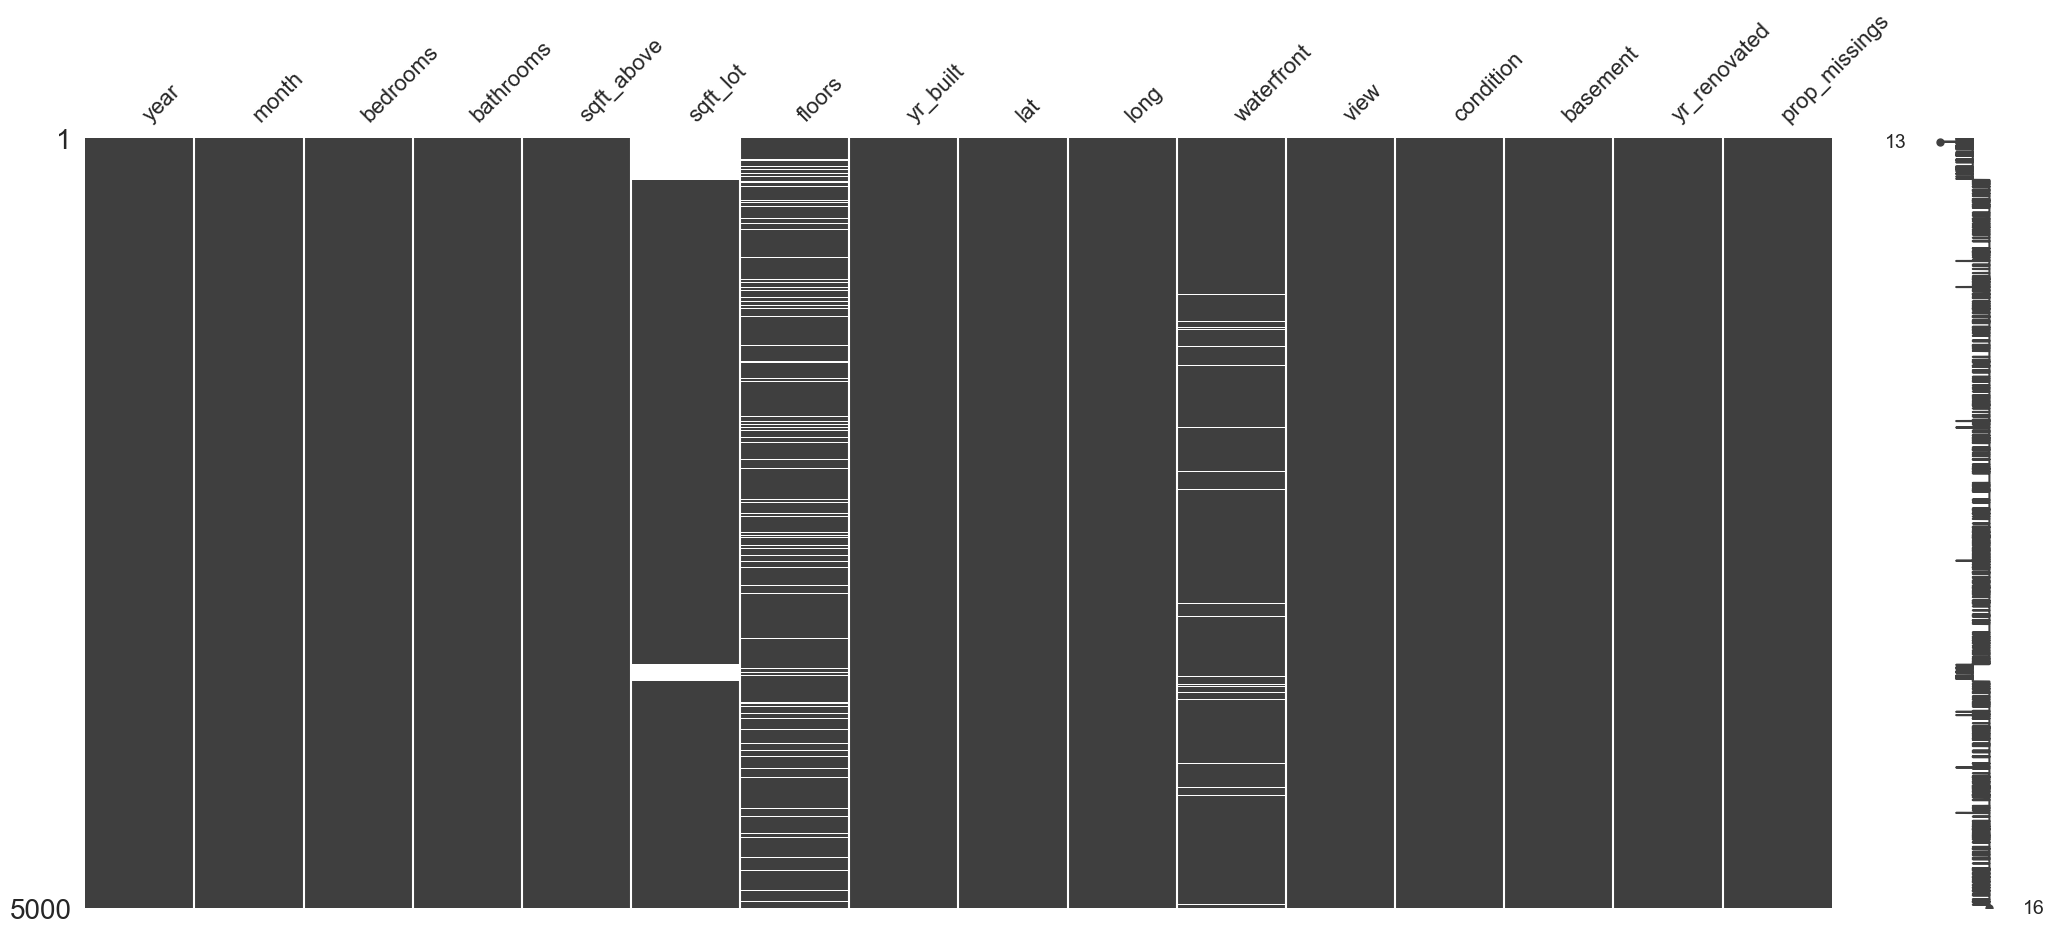

In [36]:
import missingno as msno   

# Plot correlation heatmap of missingness to visualize possible patterns
msno.matrix(imput_wins)#.sort_values(by='sqft_loft'))

In [37]:
imput_wins.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 4080 entries, 272 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           4080 non-null   int64   
 1   month          4080 non-null   int64   
 2   bedrooms       4080 non-null   int64   
 3   bathrooms      4080 non-null   float64 
 4   sqft_above     4080 non-null   int64   
 5   sqft_lot       4080 non-null   float64 
 6   floors         4080 non-null   float64 
 7   yr_built       4080 non-null   int64   
 8   lat            4080 non-null   float64 
 9   long           4080 non-null   float64 
 10  waterfront     4080 non-null   category
 11  view           4080 non-null   category
 12  condition      4080 non-null   category
 13  basement       4080 non-null   category
 14  yr_renovated   4080 non-null   category
 15  prop_missings  4080 non-null   float64 
dtypes: category(5), float64(6), int64(5)
memory usage: 405.5 KB


### Impact of Dropping Missing Values

If we decide to drop all records with missing values, we would lose approximately 9.8% of the dataset. While this may not drastically reduce the data size, it's important to consider whether this loss of information could impact the model's performance, especially if the missing data is not randomly distributed.


Now lets define the basis for imputing data

In [38]:
import sklearn.impute as skl_imp
from sklearn.experimental import enable_iterative_imputer

# Mode: Only nominal variables
imputer_moda = skl_imp.SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# KNN: Only numerical variables
imputer_knn = skl_imp.KNNImputer(n_neighbors=3)

# Chain equations: Only numerical variables
imputer_itImp = skl_imp.IterativeImputer(max_iter=10, random_state=0)

# Conda install feature_engine
import feature_engine.imputation as fe_imp

# Random: Numerical and nominal variables
imputer_rand = fe_imp.RandomSampleImputer()

# Median: Only numerical variables
imputer_median = fe_imp.MeanMedianImputer(imputation_method='median')

# Mean: Only numerical variables
imputer_mean = fe_imp.MeanMedianImputer(imputation_method='mean')


In [39]:
imput_wins_cont = imput_wins.select_dtypes(include=np.number)
imput_wins_cat = imput_wins.select_dtypes(exclude=np.number)
imput_wins_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5000 non-null   int64  
 1   month          5000 non-null   int64  
 2   bedrooms       5000 non-null   int64  
 3   bathrooms      5000 non-null   float64
 4   sqft_above     5000 non-null   int64  
 5   sqft_lot       4618 non-null   float64
 6   floors         4516 non-null   float64
 7   yr_built       5000 non-null   int64  
 8   lat            5000 non-null   float64
 9   long           5000 non-null   float64
 10  prop_missings  5000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 429.8 KB


### Univariate Imputation Methods

We begin by considering univariate imputation methods, which rely solely on the distribution of the variable itself, without taking into account the relationships with other variables. Common methods in this category include:

- **Mean Imputation**: Replacing missing values with the mean of the observed values.
- **Median Imputation**: Replacing missing values with the median of the observed values, which can be more robust to outliers.
- **Random Imputation**: Replacing missing values with random values drawn from the observed distribution of the variable.

These methods are simple and can be effective when missing values are randomly distributed and not dependent on other variables.


In [40]:
# Mean
viv_winsor_mean_imputed = imputer_mean.fit_transform(imput_wins_cont)#.transform(imput_wins_cont)
print(viv_winsor_mean_imputed.describe())
print(viviendas.describe())

# Median
viv_winsor_median_imputed = imputer_median.fit(imput_wins_cont).transform(imput_wins_cont)
print(viv_winsor_median_imputed.describe())

              year        month     bedrooms    bathrooms   sqft_above  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2014.316800     6.589400     3.396400     2.139500  2073.604000   
std       0.465275     3.120377     1.037055     0.867606   895.123004   
min    2014.000000     1.000000     0.000000     0.000000   370.000000   
25%    2014.000000     4.000000     3.000000     1.500000  1410.000000   
50%    2014.000000     6.000000     3.000000     2.500000  1910.000000   
75%    2015.000000     9.000000     4.000000     2.500000  2560.000000   
max    2015.000000    12.000000    10.000000     6.000000  6110.000000   

           sqft_lot       floors     yr_built          lat         long  \
count  5.000000e+03  5000.000000  5000.000000  5000.000000  5000.000000   
mean   1.486851e+04     1.487378  1971.084200    47.561237  -122.213939   
std    3.737325e+04     0.533773    29.242444     0.138218     0.140419   
min    6.380000e+02     1.000000 

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomMeanMedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, imputation_method='mean', variables=None):
        self.imputation_method = imputation_method
        self.variables = variables

    def fit(self, X, y=None):
        # Implement fitting logic here
        return self

    def transform(self, X):
        # Implement transformation logic here
        return X

    def __sklearn_tags__(self):
        tags = super().__sklearn_tags__()
        tags['transformer_tags'] = {'missing_values': 'NaN'}
        return tags

In [42]:
print(viv_winsor_median_imputed.info())
print(viv_winsor_mean_imputed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5000 non-null   int64  
 1   month          5000 non-null   int64  
 2   bedrooms       5000 non-null   int64  
 3   bathrooms      5000 non-null   float64
 4   sqft_above     5000 non-null   int64  
 5   sqft_lot       5000 non-null   float64
 6   floors         5000 non-null   float64
 7   yr_built       5000 non-null   int64  
 8   lat            5000 non-null   float64
 9   long           5000 non-null   float64
 10  prop_missings  5000 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 429.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           5000 non-null   int64  
 1   month          5000 

### Imputation Using k-Nearest Neighbors (k-NN)

On one hand, imputations based on the **k-nearest neighbors (k-NN)** technique are considered a spatial method. This approach associates the missing values with the average values of the k nearest neighbors, but within a multidimensional space, denoted as \( R^k \), where \( k \) is the number of variables. Essentially, it identifies similar records across all variables, considering those that are closest in this high-dimensional space. 

This method is beneficial because it leverages the overall similarity between records across the dataset, making it a good option for imputing missing values.

However, the biggest challenge with k-NN imputation is its dependence on the value of \( k \). The optimal value for \( k \) is data-dependent and lacks universal consensus, requiring experimentation. Additionally, this method may lead to potential overfitting, especially when used in conjunction with other complex techniques, as it may capture noise and specific patterns in the training data that do not generalize well.


In [43]:
# Fit/transform
imput_wins_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)
imput_wins_itImp_imputed = pd.DataFrame(imputer_itImp.fit_transform(imput_wins_cont),columns=imput_wins_cont.columns)


In [44]:
imput_wins_itImp_imputed.head()

,year,month,bedrooms,bathrooms,sqft_above,sqft_lot,floors,yr_built,lat,long,prop_missings
0,2014.0,7.0,3.0,2.5,2070.0,14858.151440,1.000000,1980.0,47.5936,-122.013,6.666667
1,2014.0,6.0,2.0,1.5,1640.0,12117.181973,0.853948,1916.0,47.6624,-122.325,13.333333
2,2014.0,10.0,4.0,3.5,3720.0,25405.193883,1.000000,2007.0,47.3216,-121.940,6.666667
3,2014.0,12.0,3.0,3.5,2260.0,16070.215250,2.000000,2003.0,47.6422,-122.361,6.666667
4,2014.0,10.0,3.0,2.0,2050.0,14732.032189,1.000000,1960.0,47.7447,-122.328,6.666667


### Imputation for Categorical Variables

For categorical variables, imputation methods typically focus on replacing missing values with the most frequent category or a random selection from the existing categories. The following methods can be used:

- **Mode Imputation**: Replacing missing values with the mode, or the most frequently occurring category in the dataset. This method works well when one category is dominant and missing values are relatively small.
  
- **Random Imputation**: Replacing missing values with randomly selected values from the existing categories. This method can be useful when there is no clear dominant category, but it introduces some randomness into the imputation process.

These imputation methods are simple but effective for categorical data, especially when the missing data is assumed to be missing at random (MAR).


In [45]:
imput_wins_moda_imputed = pd.DataFrame(imputer_moda.fit_transform(imput_wins_cat),columns=imput_wins_cat.columns)

imput_wins_moda_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   waterfront    5000 non-null   object
 1   view          5000 non-null   object
 2   condition     5000 non-null   object
 3   basement      5000 non-null   object
 4   yr_renovated  5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


### Generating a Custom Imputation Configuration Dataset

At this point in the process, we can combine the imputed numeric and categorical columns to create a custom imputation configuration dataset. This allows us to handle both types of variables effectively by leveraging the respective imputation methods for each:

- **Numeric Variables**: Imputed using methods such as mean, median, or k-nearest neighbors, depending on the specific characteristics and distribution of each variable.
  
- **Categorical Variables**: Imputed using mode or random imputation, based on the nature of the data and the frequency of categories.

By combining both sets of imputed variables into a single dataset, we create a unified dataset that can be used for further analysis or modeling. This imputation configuration will help us maintain consistency across the dataset while addressing missing data in both numeric and categorical features.


In [46]:

viviendas_wins_knn_moda = pd.concat([imput_wins_knn_imputed,imput_wins_moda_imputed.astype('category'),viviendas['price'],viviendas['Luxury']], axis=1)
viviendas_wins_knn_moda.describe()

viviendas_wins_knn_moda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           5000 non-null   float64 
 1   month          5000 non-null   float64 
 2   bedrooms       5000 non-null   float64 
 3   bathrooms      5000 non-null   float64 
 4   sqft_above     5000 non-null   float64 
 5   sqft_lot       5000 non-null   float64 
 6   floors         5000 non-null   float64 
 7   yr_built       5000 non-null   float64 
 8   lat            5000 non-null   float64 
 9   long           5000 non-null   float64 
 10  prop_missings  5000 non-null   float64 
 11  waterfront     5000 non-null   category
 12  view           5000 non-null   category
 13  condition      5000 non-null   category
 14  basement       5000 non-null   category
 15  yr_renovated   5000 non-null   category
 16  price          5000 non-null   int64   
 17  Luxury         5000 non-null   ca

By following this approach, we select the most appropriate imputation method and can save the cleaned dataset, including the target variables, for use in the subsequent phase of predictive model development.


In [47]:
viviendas.to_parquet('testtype.pqt')
df_pqt=pd.read_parquet('testtype.pqt')
df_pqt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   year          5000 non-null   int64   
 1   month         5000 non-null   int64   
 2   price         5000 non-null   int64   
 3   Luxury        5000 non-null   int64   
 4   bedrooms      5000 non-null   int64   
 5   bathrooms     5000 non-null   float64 
 6   sqft_above    5000 non-null   int64   
 7   sqft_lot      4618 non-null   float64 
 8   floors        4516 non-null   float64 
 9   waterfront    4894 non-null   float64 
 10  view          5000 non-null   int64   
 11  condition     5000 non-null   category
 12  sqft_living   1956 non-null   float64 
 13  basement      5000 non-null   int64   
 14  yr_built      5000 non-null   int64   
 15  yr_renovated  5000 non-null   int64   
 16  lat           5000 non-null   float64 
 17  long          5000 non-null   float64 
dtypes: categ

### Random Imputation for All Types of Variables

We apply random imputation at a general level, as it is compatible with all types of variables. In this case, we use the complete input file, ensuring that all variables are accounted for in the imputation process.


In [48]:
imput_wins_rand_imputed = imputer_rand.fit(imput_wins).transform(imput_wins)
imput_wins_rand_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           5000 non-null   int64   
 1   month          5000 non-null   int64   
 2   bedrooms       5000 non-null   int64   
 3   bathrooms      5000 non-null   float64 
 4   sqft_above     5000 non-null   int64   
 5   sqft_lot       5000 non-null   float64 
 6   floors         5000 non-null   float64 
 7   yr_built       5000 non-null   int64   
 8   lat            5000 non-null   float64 
 9   long           5000 non-null   float64 
 10  waterfront     5000 non-null   category
 11  view           5000 non-null   category
 12  condition      5000 non-null   category
 13  basement       5000 non-null   category
 14  yr_renovated   5000 non-null   category
 15  prop_missings  5000 non-null   float64 
dtypes: category(5), float64(6), int64(5)
memory usage: 457.3 KB


In [49]:
# Convert the 'floors' column to 'category' type
imput_wins_rand_imputed['floors'] = imput_wins_rand_imputed['floors'].astype('int64')
imput_wins_rand_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           5000 non-null   int64   
 1   month          5000 non-null   int64   
 2   bedrooms       5000 non-null   int64   
 3   bathrooms      5000 non-null   float64 
 4   sqft_above     5000 non-null   int64   
 5   sqft_lot       5000 non-null   float64 
 6   floors         5000 non-null   int64   
 7   yr_built       5000 non-null   int64   
 8   lat            5000 non-null   float64 
 9   long           5000 non-null   float64 
 10  waterfront     5000 non-null   category
 11  view           5000 non-null   category
 12  condition      5000 non-null   category
 13  basement       5000 non-null   category
 14  yr_renovated   5000 non-null   category
 15  prop_missings  5000 non-null   float64 
dtypes: category(5), float64(5), int64(6)
memory usage: 457.3 KB


### Saving the Cleaned File

At this stage, we have chosen to maintain the approach of handling outliers through winsorization and addressing missing values (NAs) with random imputation, due to the simplicity and ease of applying these methods across the entire dataset.


In [50]:
# Agregar variables objetivo al input ya limpio
viviendas_wins_rand_imputed= pd.concat([imput_wins_rand_imputed, viviendas['price'],viviendas['Luxury']], axis=1)
print(viviendas_wins_rand_imputed.dtypes)
# Guardar archivo
#vinos_wins_rand_imputed.to_csv('DatosVinoDep_winsRand.csv')

#pip install datasette-pytables
#-m pip install tables

viviendas_wins_rand_imputed.to_hdf('Dep_VentaViviendas_winsRand.h5',key='df',format='table')

vn=pd.read_hdf('Dep_VentaViviendas_winsRand.h5','df')
vn.info()

year                int64
month               int64
bedrooms            int64
bathrooms         float64
sqft_above          int64
sqft_lot          float64
floors              int64
yr_built            int64
lat               float64
long              float64
waterfront       category
view             category
condition        category
basement         category
yr_renovated     category
prop_missings     float64
price               int64
Luxury           category
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   year           5000 non-null   int64   
 1   month          5000 non-null   int64   
 2   bedrooms       5000 non-null   int64   
 3   bathrooms      5000 non-null   float64 
 4   sqft_above     5000 non-null   int64   
 5   sqft_lot       5000 non-null   float64 
 6   floors         5000 non-null   int64   
 7   yr_bui

In [51]:
viviendas_wins_rand_imputed.to_excel('dep_VentaViviendas.xlsx', index=False)